# **Task 1 : Data Cleaning and Preparation**

In [33]:
import pandas as pd
d= pd.read_csv('/content/drive/MyDrive/Codved Internship/Data Sets for Internship/Data Set For Task/1) iris.csv')

In [34]:
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
df=d

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Inspect for missing values

Check for missing values in the dataset.


**Reasoning**:
Check for missing values in the DataFrame by using isnull() and sum().



In [37]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Handle missing values


Address any missing values found, possibly by imputation or removal.


## Inspect for duplicate rows


Check for duplicate rows in the dataset.


**Reasoning**:
Check for duplicate rows in the DataFrame and count the total number of duplicate rows.



In [38]:
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 3


## Handle duplicate rows

Remove any duplicate rows found.


**Reasoning**:
Remove duplicate rows from the DataFrame and then verify the removal by checking the number of duplicate rows again.



In [39]:
df.drop_duplicates(inplace=True)
duplicate_rows_after_removal = df.duplicated().sum()
print(f"Total number of duplicate rows after removal: {duplicate_rows_after_removal}")

Total number of duplicate rows after removal: 0


## Inspect for inconsistent data formats

Examine columns for inconsistent data formats.


**Reasoning**:
Iterate through columns and check for inconsistent data types or values that don't match the expected format based on the column's intended type.



In [40]:
for col in df.columns:
    print(f"Examining column: {col}")
    # Check data type
    dtype = df[col].dtype
    print(f"Data type: {dtype}")

    # For object type columns (potentially categorical or mixed types)
    if dtype == 'object':
        unique_values = df[col].unique()
        print(f"Unique values: {unique_values}")
        # Additional checks for non-numeric values in numeric columns (if applicable)
    elif dtype in ['float64', 'int64']:
        # This check is more for identifying non-numeric strings that might have been coerced
        # or mixed in with numbers, though with pure numeric types it's less likely.
        # We can check if all values can be converted to numeric if there's a suspicion
        try:
            pd.to_numeric(df[col], errors='raise')
            print("Column contains only numeric values (or can be converted to numeric).")
        except ValueError:
            print("Column contains non-numeric values.")
            # To find the inconsistent entries, we could filter rows where conversion fails
            non_numeric_mask = pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()
            inconsistent_entries = df[col][non_numeric_mask].unique()
            print(f"Inconsistent entries found: {inconsistent_entries}")

    print("-" * 30)


Examining column: sepal_length
Data type: float64
Column contains only numeric values (or can be converted to numeric).
------------------------------
Examining column: sepal_width
Data type: float64
Column contains only numeric values (or can be converted to numeric).
------------------------------
Examining column: petal_length
Data type: float64
Column contains only numeric values (or can be converted to numeric).
------------------------------
Examining column: petal_width
Data type: float64
Column contains only numeric values (or can be converted to numeric).
------------------------------
Examining column: species
Data type: object
Unique values: ['setosa' 'versicolor' 'virginica']
------------------------------


## Handle inconsistent data formats

Address any inconsistent data formats, possibly by converting data types or standardizing entries.


## Summarize cleaned data

Display the cleaned data and its information to verify the cleaning steps.


**Reasoning**:
Display the first few rows and information of the cleaned DataFrame to verify the cleaning steps.



In [41]:
display(df.head())
df.info()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained no missing values.
*   Three duplicate rows were identified and successfully removed from the dataset.
*   After removing duplicates, the dataset contains 147 entries.
*   No inconsistent data formats were found in the columns; numerical columns were confirmed to contain only numeric values, and the 'species' column contained only three consistent unique values ('setosa', 'versicolor', 'virginica').

### Insights or Next Steps

*   The dataset is now clean and ready for further analysis or modeling.
*   The next step could involve exploratory data analysis (EDA) to understand the distribution and relationships between the features.


# **Task 2 : Exploratory Data Analysis (EDA)**

## Data Visualization

Creating some visualizations to understand the data distribution and relationships between features.

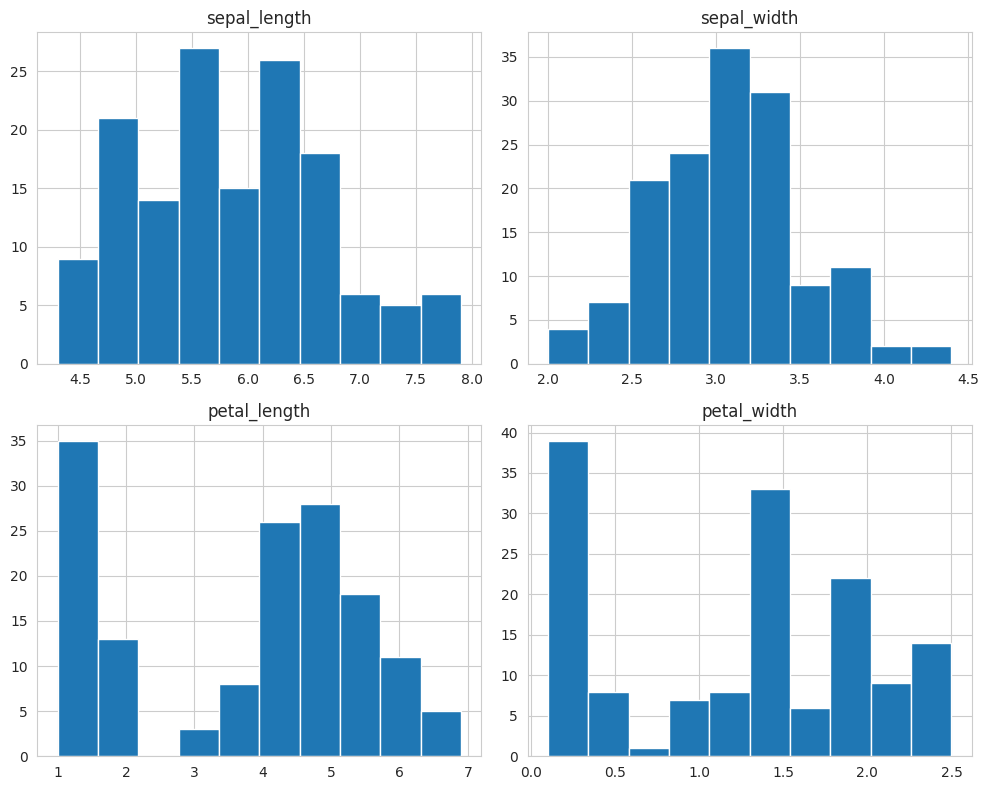

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for each numeric feature to see their distributions
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Creating scatter plots to visualize the relationships between pairs of features, colored by species. This can help us see how well the features separate the different species.

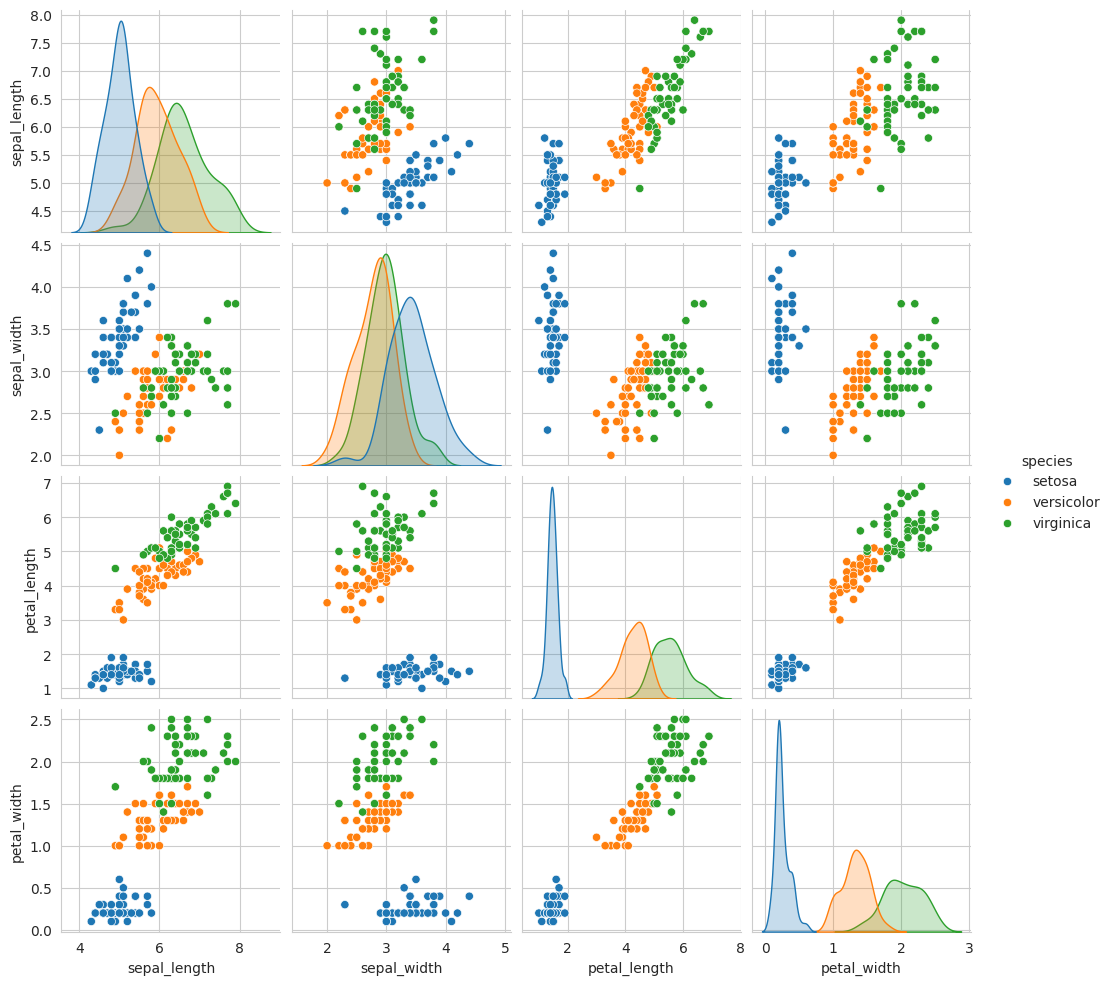

In [43]:
# Create scatter plots for pairs of features, colored by species
sns.pairplot(df, hue="species", height=2.5)
plt.show()

In [44]:
# Select only numeric columns for aggregation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

summary_statistics = numeric_df.agg(['mean', 'median', 'std'])
print("\nSummary Statistics:")
print(summary_statistics)

# Mode can have multiple values, so it's handled separately
mode_values = df.mode(numeric_only=True)
print("\nMode values:")
print(mode_values)


Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width
mean        5.856463     3.055782      3.780272     1.208844
median      5.800000     3.000000      4.400000     1.300000
std         0.829100     0.437009      1.759111     0.757874

Mode values:
   sepal_length  sepal_width  petal_length  petal_width
0           5.0          3.0           1.4          0.2
1           NaN          NaN           1.5          NaN


# Task 3: Basic Data Visualization

Let's create basic plots and charts to visualize the distribution and relationships within the dataset.

## Bar Plot

Let's create a bar plot to show the count of each species in the dataset.

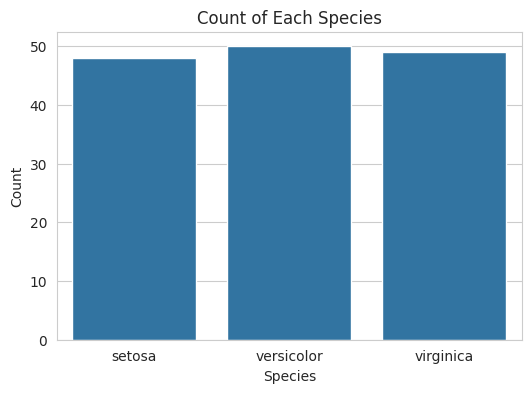

In [45]:
# Create a bar plot of species counts
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df)
plt.title('Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Scatter Plot

Let's create a scatter plot to visualize the relationship between sepal length and sepal width, colored by species.

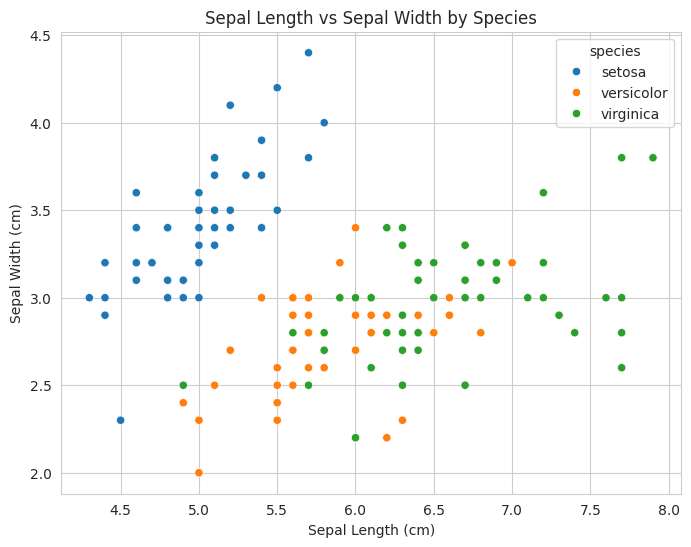

In [46]:
# Create a scatter plot of sepal length vs sepal width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

## Line Chart

Let's create a line chart. While a line chart is less typical for this kind of dataset unless showing a sequence or cumulative value, we can visualize the cumulative sum of petal length as an example.

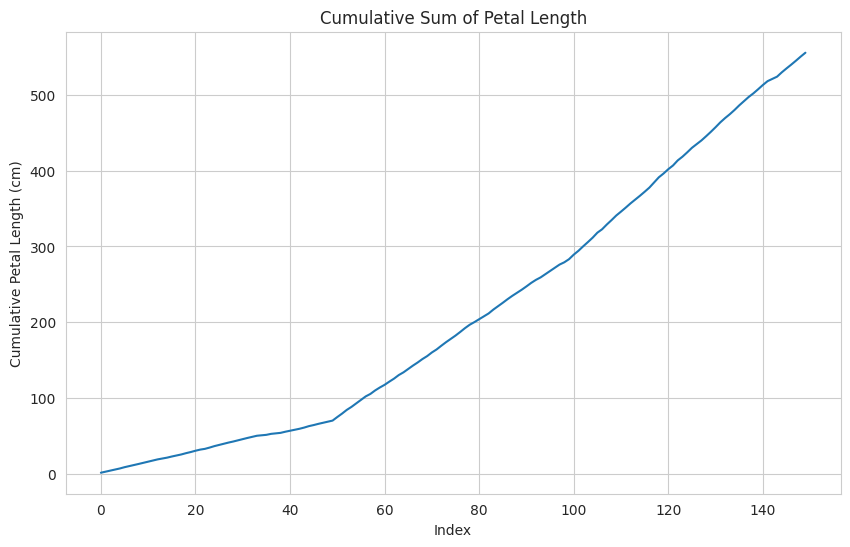

In [47]:
# Create a line chart of cumulative petal length (example)
df['cumulative_petal_length'] = df['petal_length'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_petal_length'])
plt.title('Cumulative Sum of Petal Length')
plt.xlabel('Index')
plt.ylabel('Cumulative Petal Length (cm)')
plt.show()

# Drop the cumulative column as it was just for visualization
df = df.drop(columns=['cumulative_petal_length'])